In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Investigation of logistic equation with numerical methods.

## Introduction
The chaos theory is branch in mathematics that studies behaviours of dynamical systems, which appear to be random and disordered, but in fact are governed by some patterns [1]. In such cases, these systems are very sensitive to initial conditions or to multiplication factors. Slight changes may lead to significant differences in output. One of these systems is the logistic equation, 
$$
x_{n+1} = rx_n(x_n-1),                                            (1)
$$
which looks like an ordinary recurrence function but it is in fact complex system. One of the ways to use the eq.(1) is for population modelling [1]. If $x_n$ is the population of some chosen species, $x_{n+1}$ is that population the next year and $r$ is the reproducibility rate. Turns out that it is actually a good way to model and study different populations over time. That means, a simulation can be conducted on a computer and results can be checked with the reality. Having such knowledge, humans are able to for example: calculate how much time is needed to rescue endangered species from completely dying out.
<br>
This is one of the simpler ways to put the significance of logistic equation in context, but it is not the only thing it can be applied to. The topic is about the chaos in mathematics and there is a way to achieve such behaviour with eq.(1). If the logistic equation is iterated many times for range of values of $r$ and then plotted on a graph with $r$ values on x-axis, and x values on y-axis an unusual, strange behaviour will be obtained (the graph will be achieved and shown later in this project). This is called the bifurcation diagram.
<br>
When we want to ask a computer to give us a random number it is actually a harder task then one can imagine. Computers run on algorithms, which are predictable, therefore if a program is known the number given by a computer may appear not to be random at all. Machines can not do anything that they are not programmed to do, and it may seem that asking a computer to generate something on its own seems like an impossible task [6]. In late 1940, John von Neuman proposed logistic equation as a first random number generator [2]. 
<br>
There is a mathematical way to measure randomness of the given system, called Lyapunov exponent. 
$$
\lambda(r) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=0}^{n-1}\log\mid\frac{df_r}{dx}(x_i^{(r)})\mid, (2)
$$
The idea behind it is that when we calculate the Lyapunov exponent, if it gives the negative value, that means the system is predicable, if it gives positive value, the system is said to be chaotic. It allows us to measure the sensitivity with respect to different initial conditions, and they can be thought of as a logarithmic rate of separation or convergence of two neighboring trajectories in a reconstructed state space [3]. Later along the plot of the bifurcation map, a plot of corresponding Lyapunov exponents will be visible to prove the chaotic behaviour of the logistic equation.
<br>
Another interesting property of the logistic equation is that it is connected to fractals. Mandelbrot set is one of the most famous fractals that were discovered [5]. The link is made to the equation: 
$$
z_{n+1} = z_n^2 + c, (3)
$$
It turns out that a several similarities can be made between bifurcation diagram and Mandelbrot set. In fact, these two are the same thing, viewed from a different perspective, which will be shown later. It is also worth noting that logistic map was popularized by Robert May in 1976 [1], not long before the discovery of Mandelbrot set, which happened few  years later.
<br>
Last topic is the Feigenbaum constant. It is an interesting quantity, labelled as basic mathematical constant, along the quantities like $\pi$ or $e$. It’s value is $\delta$ = 4.669 [4]. It was discovered by Mitchell Feigenbaum, who obtained it from bifurcation diagram. Constant is the limiting ratio of each bifurcation interval to the next between every period doubling of a one-parameter mapping.  It also appears in other chaotic systems, like Mandelbrot set, which can prove similarity between those. Besides chaos theory, Feigenbaum constant was not found in any other field of physics or mathematics. Nevertheless, it is very surprising that a system, which is said to have chaotic behaviour, can in fact produce constant value, which appears in other dynamical systems. 
This is an outline of theory and what was tried to be accomplished. It is interesting that a simple looking equation can lead to so many different things that are still being investigated.


## Methods
Firstly, in order to obtain the bifurcation diagram it is required to understand the behaviour of logistic equation iterated for smaller range at the beginning. It is needed to consider two cases: first one for is when coefficient r value is held constant and different initial conditions are chosen, second case is when the process starts from the same initial value but is plotted for different coefficients. The make this process more relatable, this is called as population evolution over arbitrary period of time denoted as iterations. 
<br>
Now, let’s define logistic equation: 


In [2]:
def logistic(r, x):
    '''Logistic equation function'''
    return r*x*(1-x)

Having that set up we can consider case 1. Code to obtain plot of population evolution with time for different initial conditions is as follows. 

In [3]:
'''Same coefficient value, different initial condition'''
iterations = 25
n = 5         # amount of initial values
initial = np.array([0.05, 0.2, 0.5, 0.7, 0.8])
coeffn = 1.5


values = [[] for i in range(n)]  # here store all values calcualted

for i in range(n):
    values[i].append(initial[i]) # this is used to make a append the list with initial values


for i in range(iterations):# here calcualte the point with logistic equation and store them in a list
    for j in range(n):
        initial[j] = logistic(coeffn, initial[j])
        values[j].append(initial[j])

Now to obtain plot for case 2 we will need following code.

In [4]:
'''Different coefficient values and same initial condition'''
k = 10                              # amount of coefficients 
coeffk = np.linspace(0.5, 3.8, k)
ini = 0.4                           # chosen initial value
initial_val = np.ones(k)*ini        # here store initial values
values_all = [[] for i in range(k)] # here store all calcualted values

for i in range(k):
    values_all[i].append(initial_val[i]) # this is used to make a append the list with initial values

for i in range(20): # here calcualte the point with logistic equation and store them in a list
    for j in range(k):
        initial_val[j] = logistic(coeffk[j], initial_val[j])
        values_all[j].append(initial_val[j])

After the exploration of different outputs for range of initial values one can write code to obtain bifurcation diagram. The following code will also calculate Lyapunov exponent for each calculated value of logistic equation.

In [5]:
'''Code to create bifrucation diagram and calcualte Lyapunov exponent'''
m = 10000                  # number of r points
r = np.linspace(1.01, 4.0, m)
lyapunov= np.zeros(m)      #we will store exponents values here
iterations = 1000
last = 200
x = 0.5                    # initial value

for i in range(iterations):
    x = logistic(r, x)
    
    lyapunov += np.log(abs(r-2*r*x)) # here calcualte the lyapunov exponent
    
    # last two lines are erased now but will be called in later section to give a plot
    #if i >= (iterations - last):  # want to plot only specified number of iterations
     #   ax1.scatter(r, x, s = 0.005, c = 'darkgray')
        

## Results
Now, let's call the function for the case where we have different initial conditions and one coefficient value, which would be 1.5 in this case.

Text(0.5, 1.0, 'Populaton evolution for the same coefficient value = 1.5 and different initial conditions')

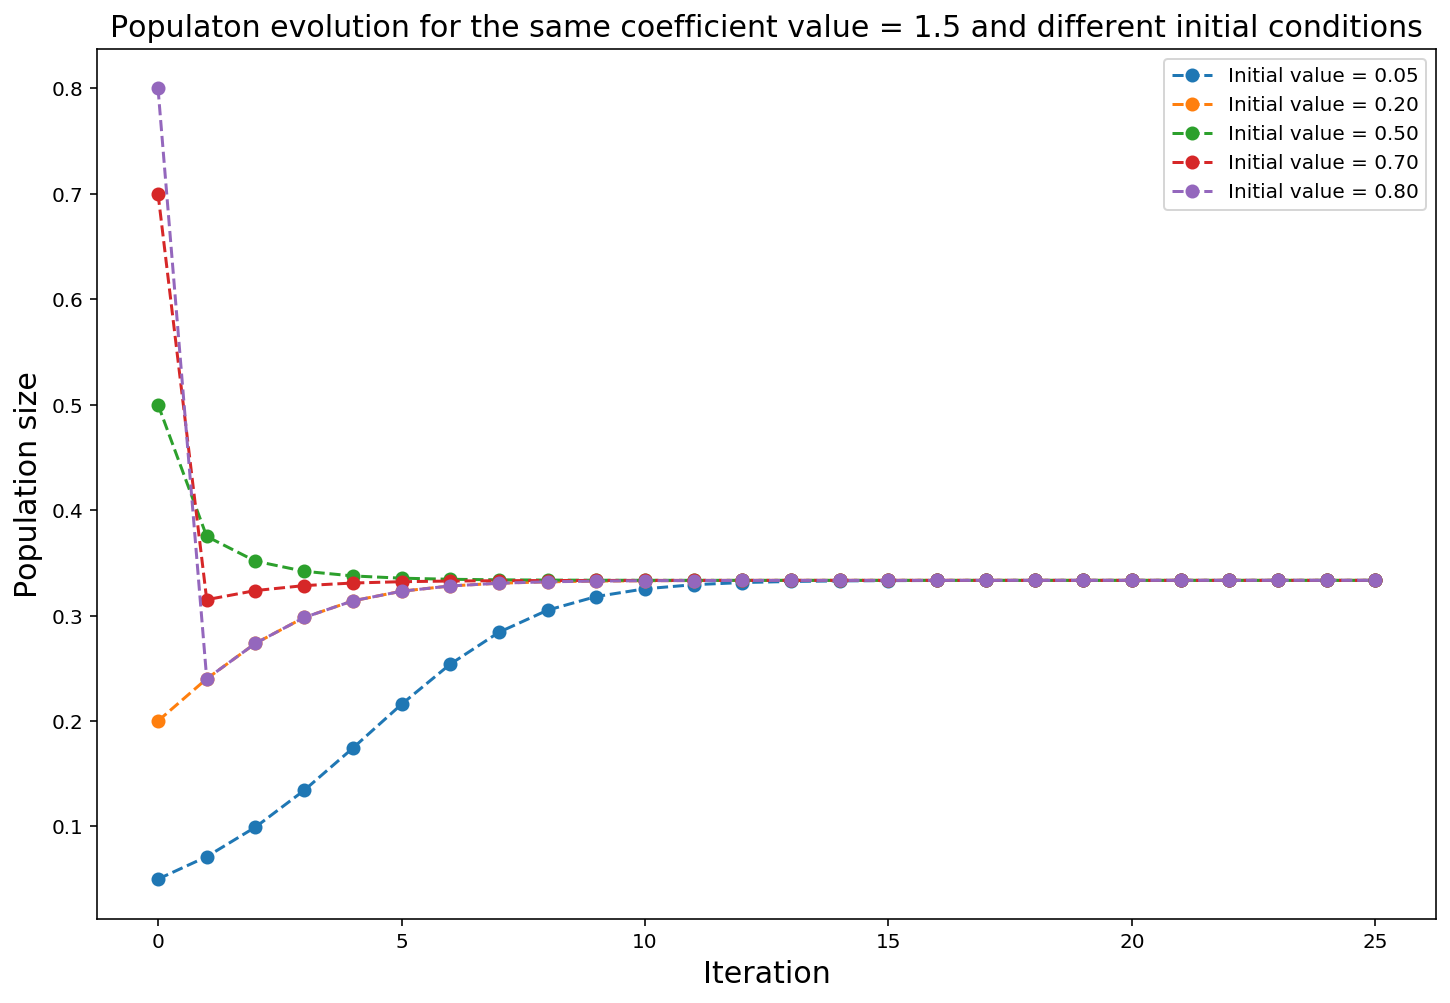

In [6]:
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(values[i], 'o--', label = 'Initial value = {:.2f}'.format(values[i][0]))
    
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Population size', fontsize = 15)
plt.title('Populaton evolution for the same coefficient value = {} and different initial conditions'.format(coeffn), fontsize = 15)

It is immediately easy to observe that all the population size values are converging to one common value, no matter where the process started. It looks interesting but the results of the same process for different coefficient values ends up giving unexpected results.

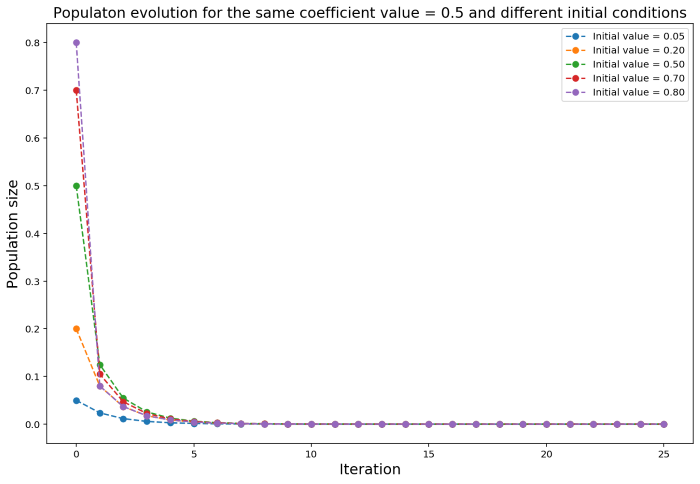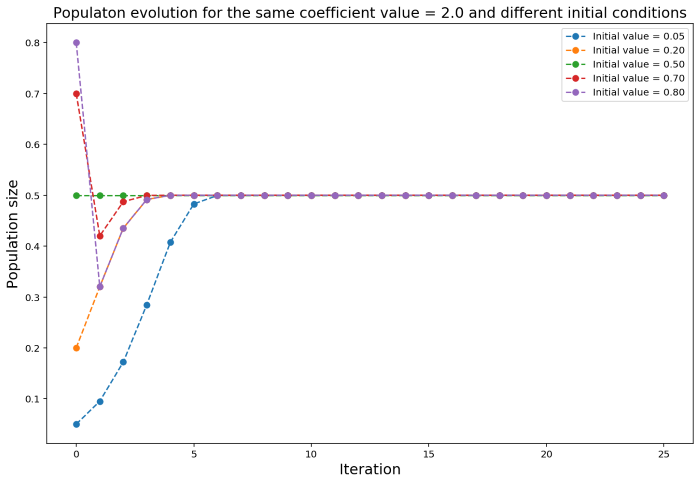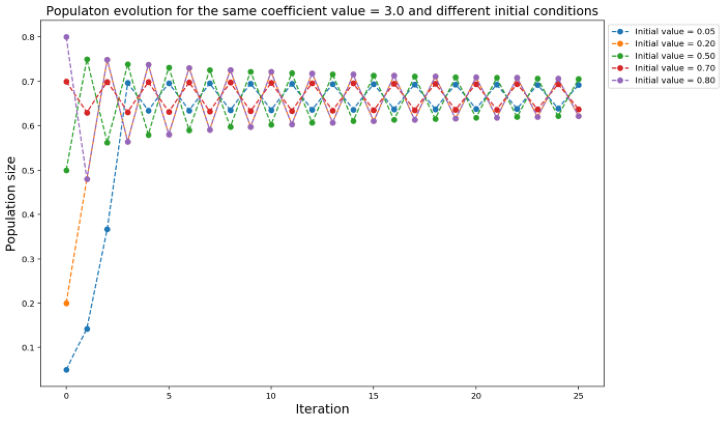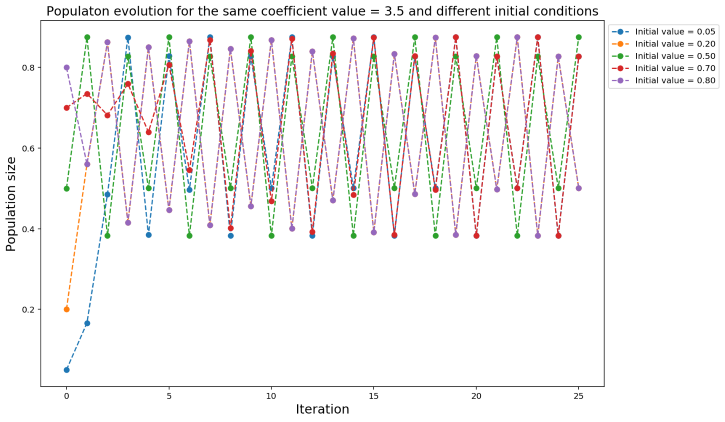
<br>
Figure 1: Plots obtained using the code for different coefficient values.

In the figures above several properties can be observed. From the investigation it appears that if coefficient has its value in range (0,1), the population evolution will converge to zero value, which means it will die out. For the range (1, 3), the population size converges to one value, which is different for each coefficient. A strange thing happens when a value of 3 is reached. The population instead of converging to one value, it starts oscillating between two values. One can say that it converges to the oscillating behaviour, since the two values are the same, so we obtain the period of two. With further incresement of coefficient the period grows. We can see that for a coefficient value of 3.5, the population is oscillating between four values. It is also important to note that initial value do not play huge role here, the most important changes are due to alternating the value of a coefficient. Then, after coefficient value 3.57 a strange thing happens.

Text(0.5, 1.0, 'Populaton evolution for the same coefficient value = 3.65 and different initial conditions')

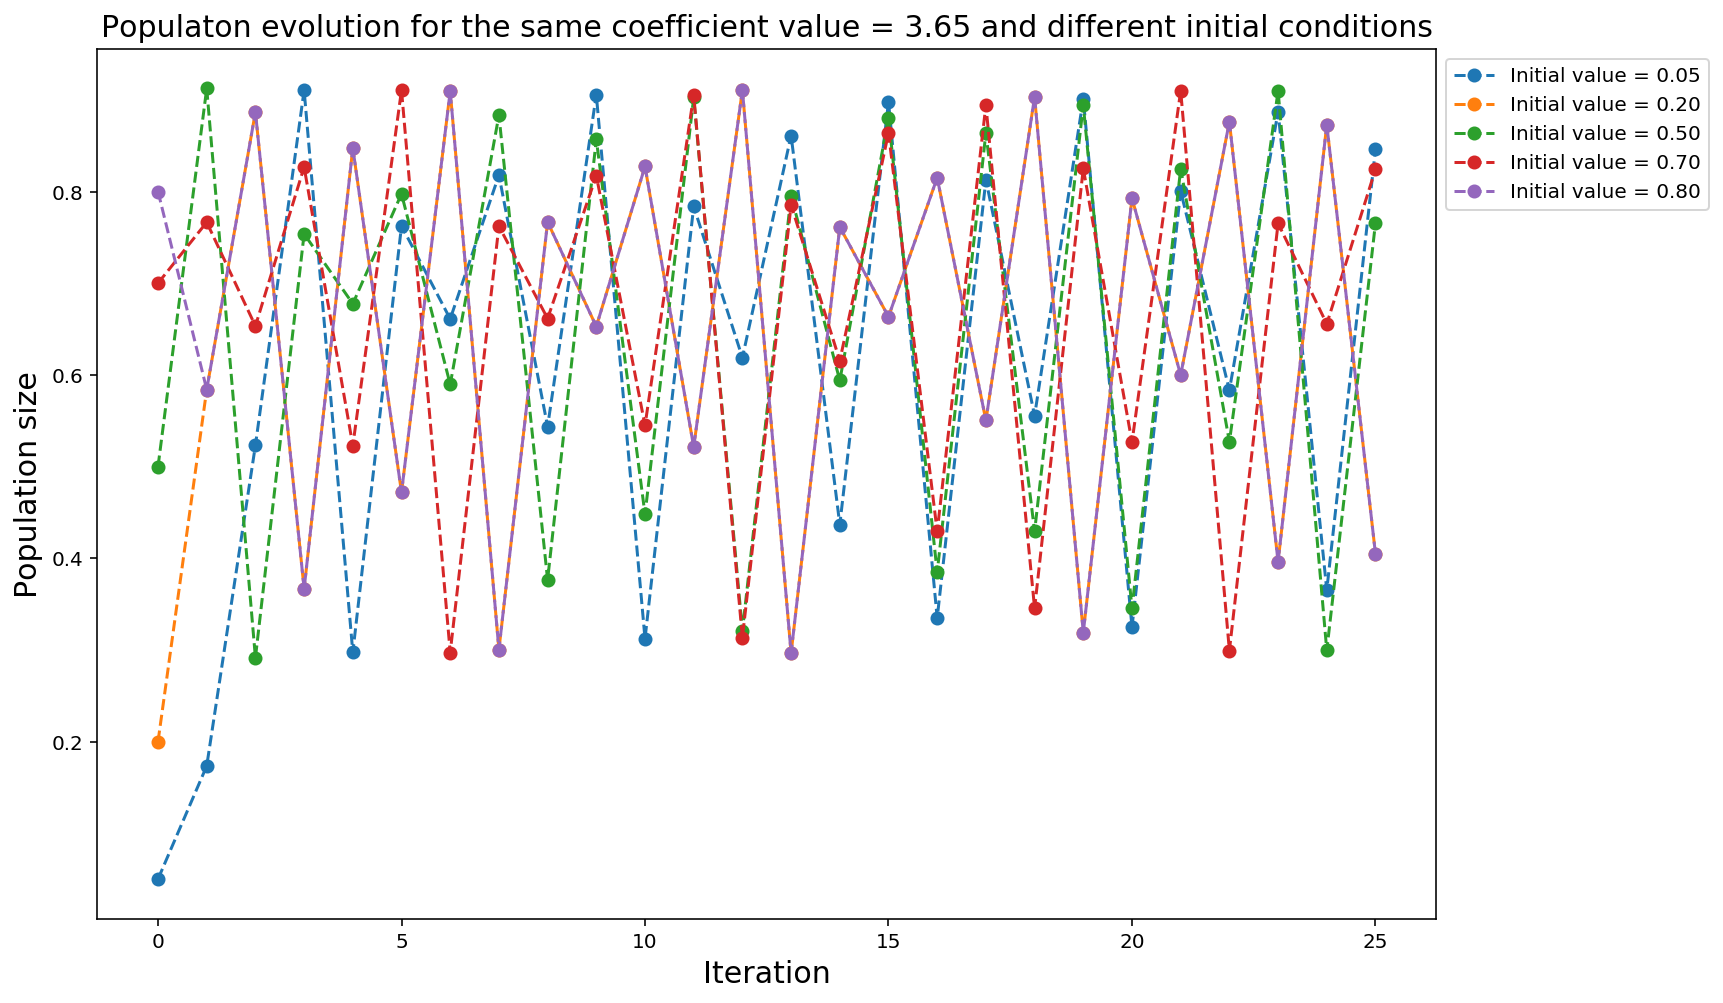

In [7]:
iterations = 25
n = 5         # amount of initial values
initial = np.array([0.05, 0.2, 0.5, 0.7, 0.8])
coeff = 3.65


values = [[] for i in range(n)]  # here store all values calcualted

for i in range(n):
    values[i].append(initial[i])


for i in range(iterations):
    for j in range(n):
        initial[j] = logistic(coeff, initial[j])
        values[j].append(initial[j])
        

plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(values[i], 'o--', label = 'Initial value = {:.2f}'.format(values[i][0]))
    
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Population size', fontsize = 15)
plt.title('Populaton evolution for the same coefficient value = {} and different initial conditions'.format(coeff), fontsize = 15)

The population size does not converge to any certain value or period. It appears to evolve in completely chaotic way. 
<br>
Now, let's look at the case 2, where we would have only one initial value and would plot the behaviour for number of different coefficients simultaneously.

(0, 1)

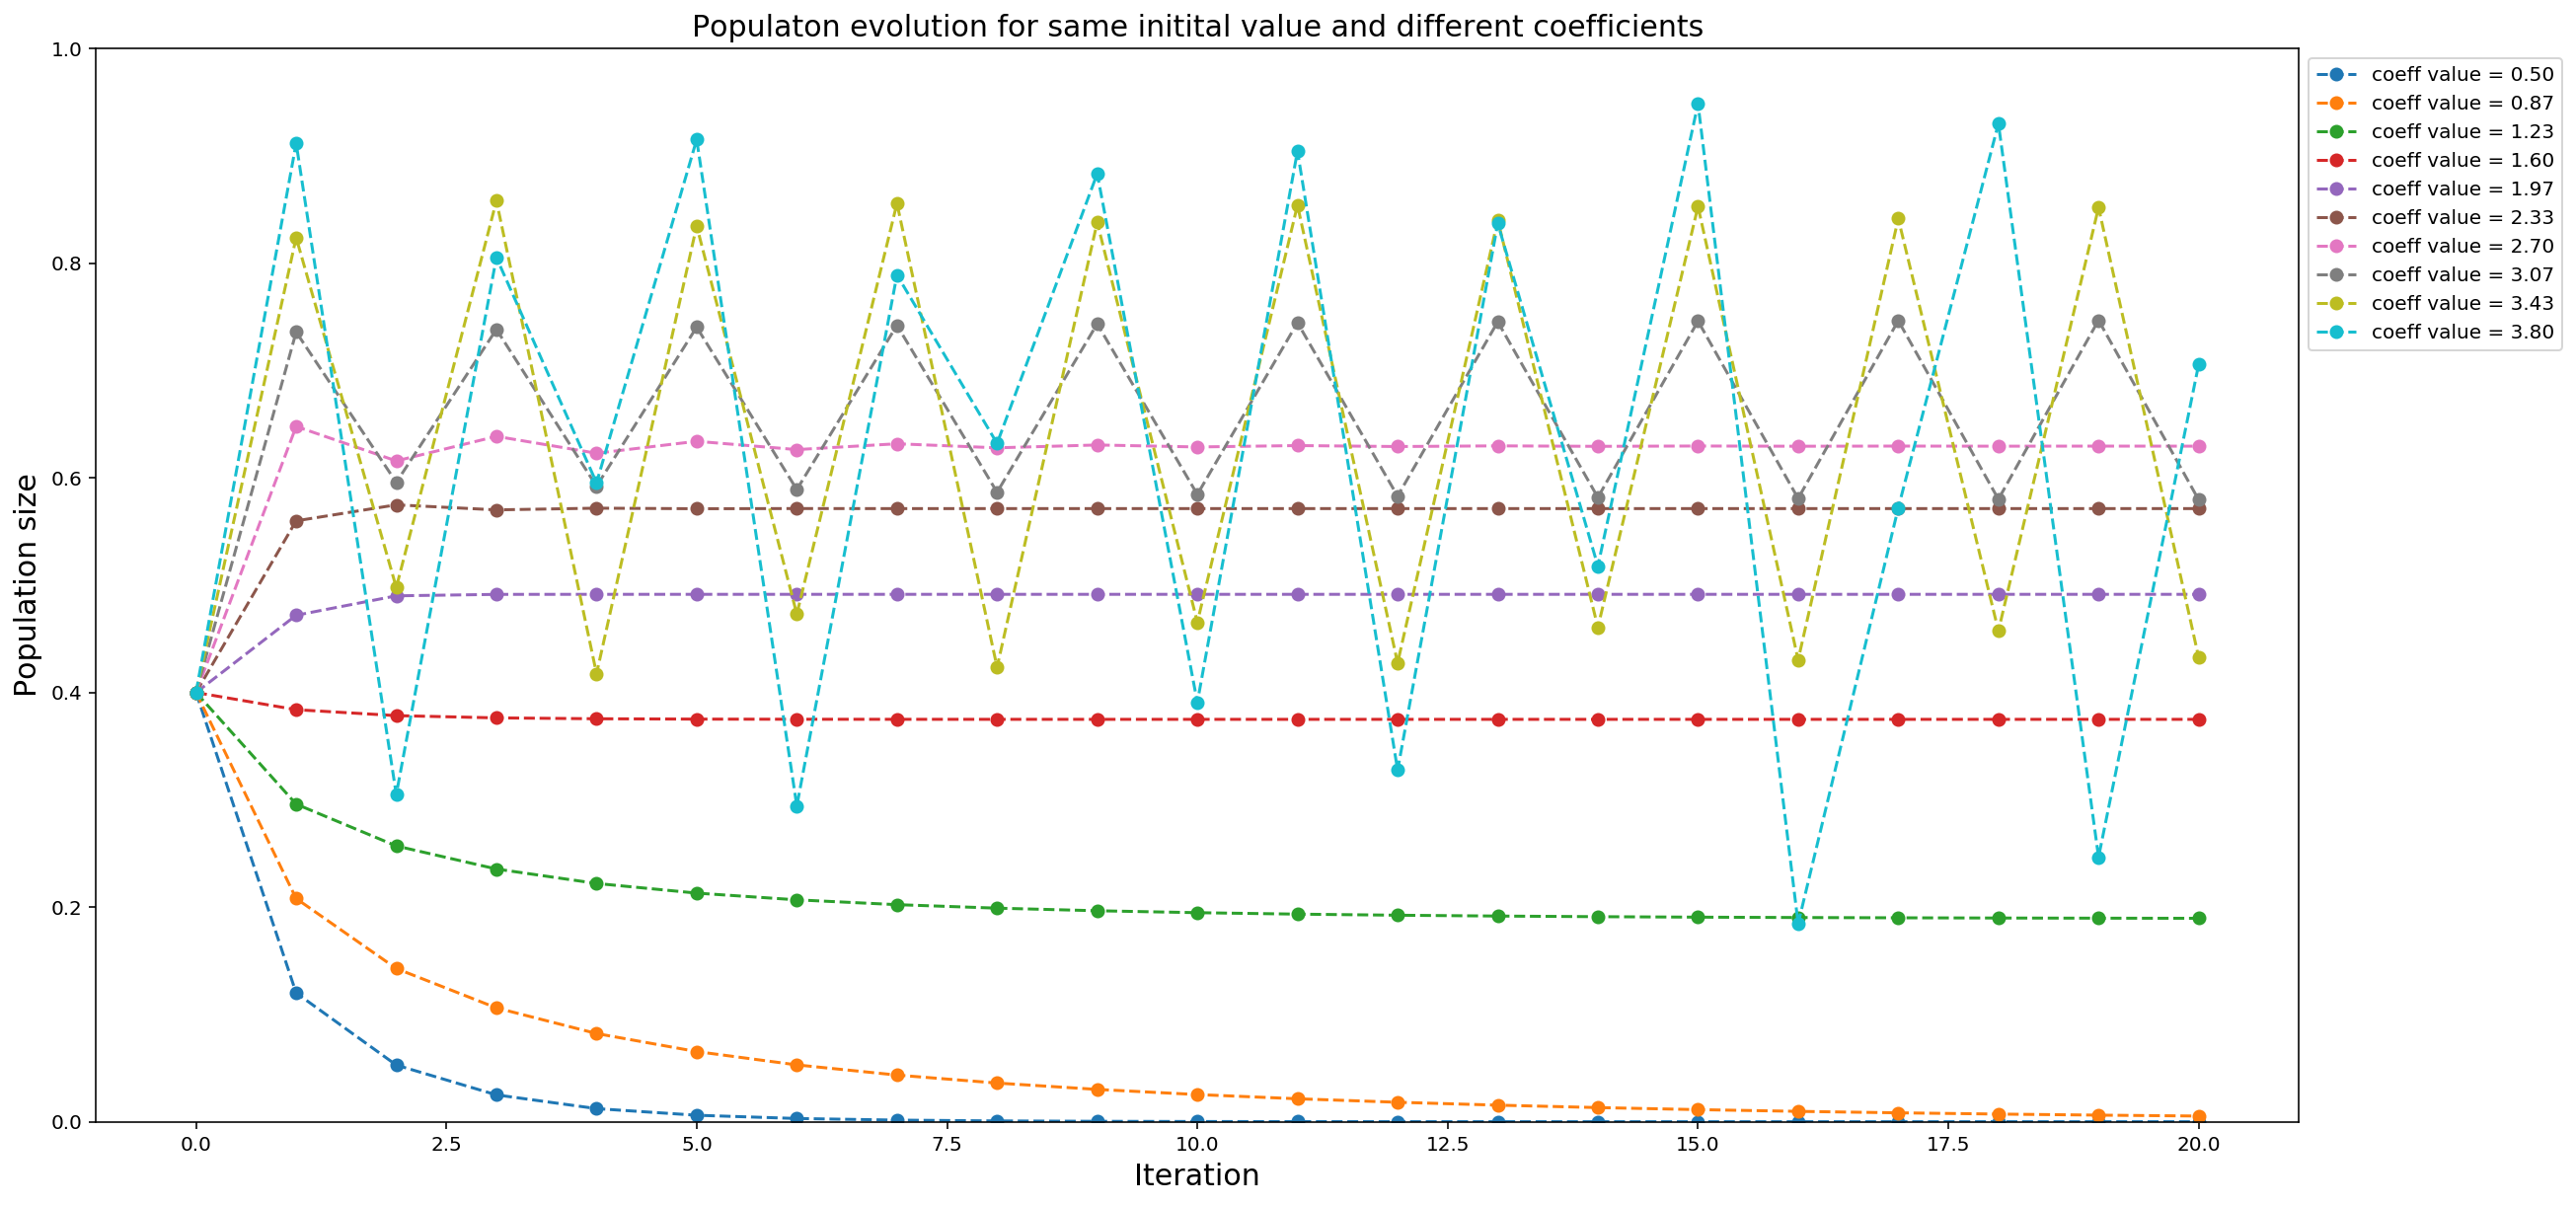

In [8]:
k = 10                              # amount of coefficients 
coeff = np.linspace(0.5, 3.8, k)
ini = 0.4                           # chosen initial value
initial_val = np.ones(k)*ini        # here store initial values
values_all = [[] for i in range(k)] # here store all calcualted values

for i in range(k):
    values_all[i].append(initial_val[i])

for i in range(20):
    for j in range(k):
        initial_val[j] = logistic(coeff[j], initial_val[j])
        values_all[j].append(initial_val[j])
plt.figure(figsize = (20,10))

for i in range(k):
    plt.plot(values_all[i], 'o--', label = 'coeff value = {:.2f}'.format(coeff[i]))


plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Populaton evolution for same initital value and different coefficients', fontsize = 15)
plt.ylabel('Population size', fontsize = 15)
plt.xlabel('Iteration', fontsize = 15)
plt.ylim(0,1)

Here, a similar behaviour is observed as in case 1. Although, all the functions start at the same point, the outputs are significantly different. Again, for coefficient value in range (0,1), the population size will be tending to zero, so it will die out. For the range (1,3), each population settles down for one value and stays on that value. The oscillatory behaviour begins from coefficient value 3 and further increasement leads to unpredictible, random behaviour of the population, which is not settling down for particular value. 
<br>
Having explored the ways of iterating over the logistic equation, now it is wanted to plot the bifurcation diagram. To do that we will iterate the logistic equation over a huge number, so that we allow it to have the chance to settle down for a particular value or to oscillate between the range of values. We will take last 200 iterations of each process and plot it as a dot on the graph. Along the way, a Lapunov exponent will be calcualted for each point we have had iterated through.

(1, 4)

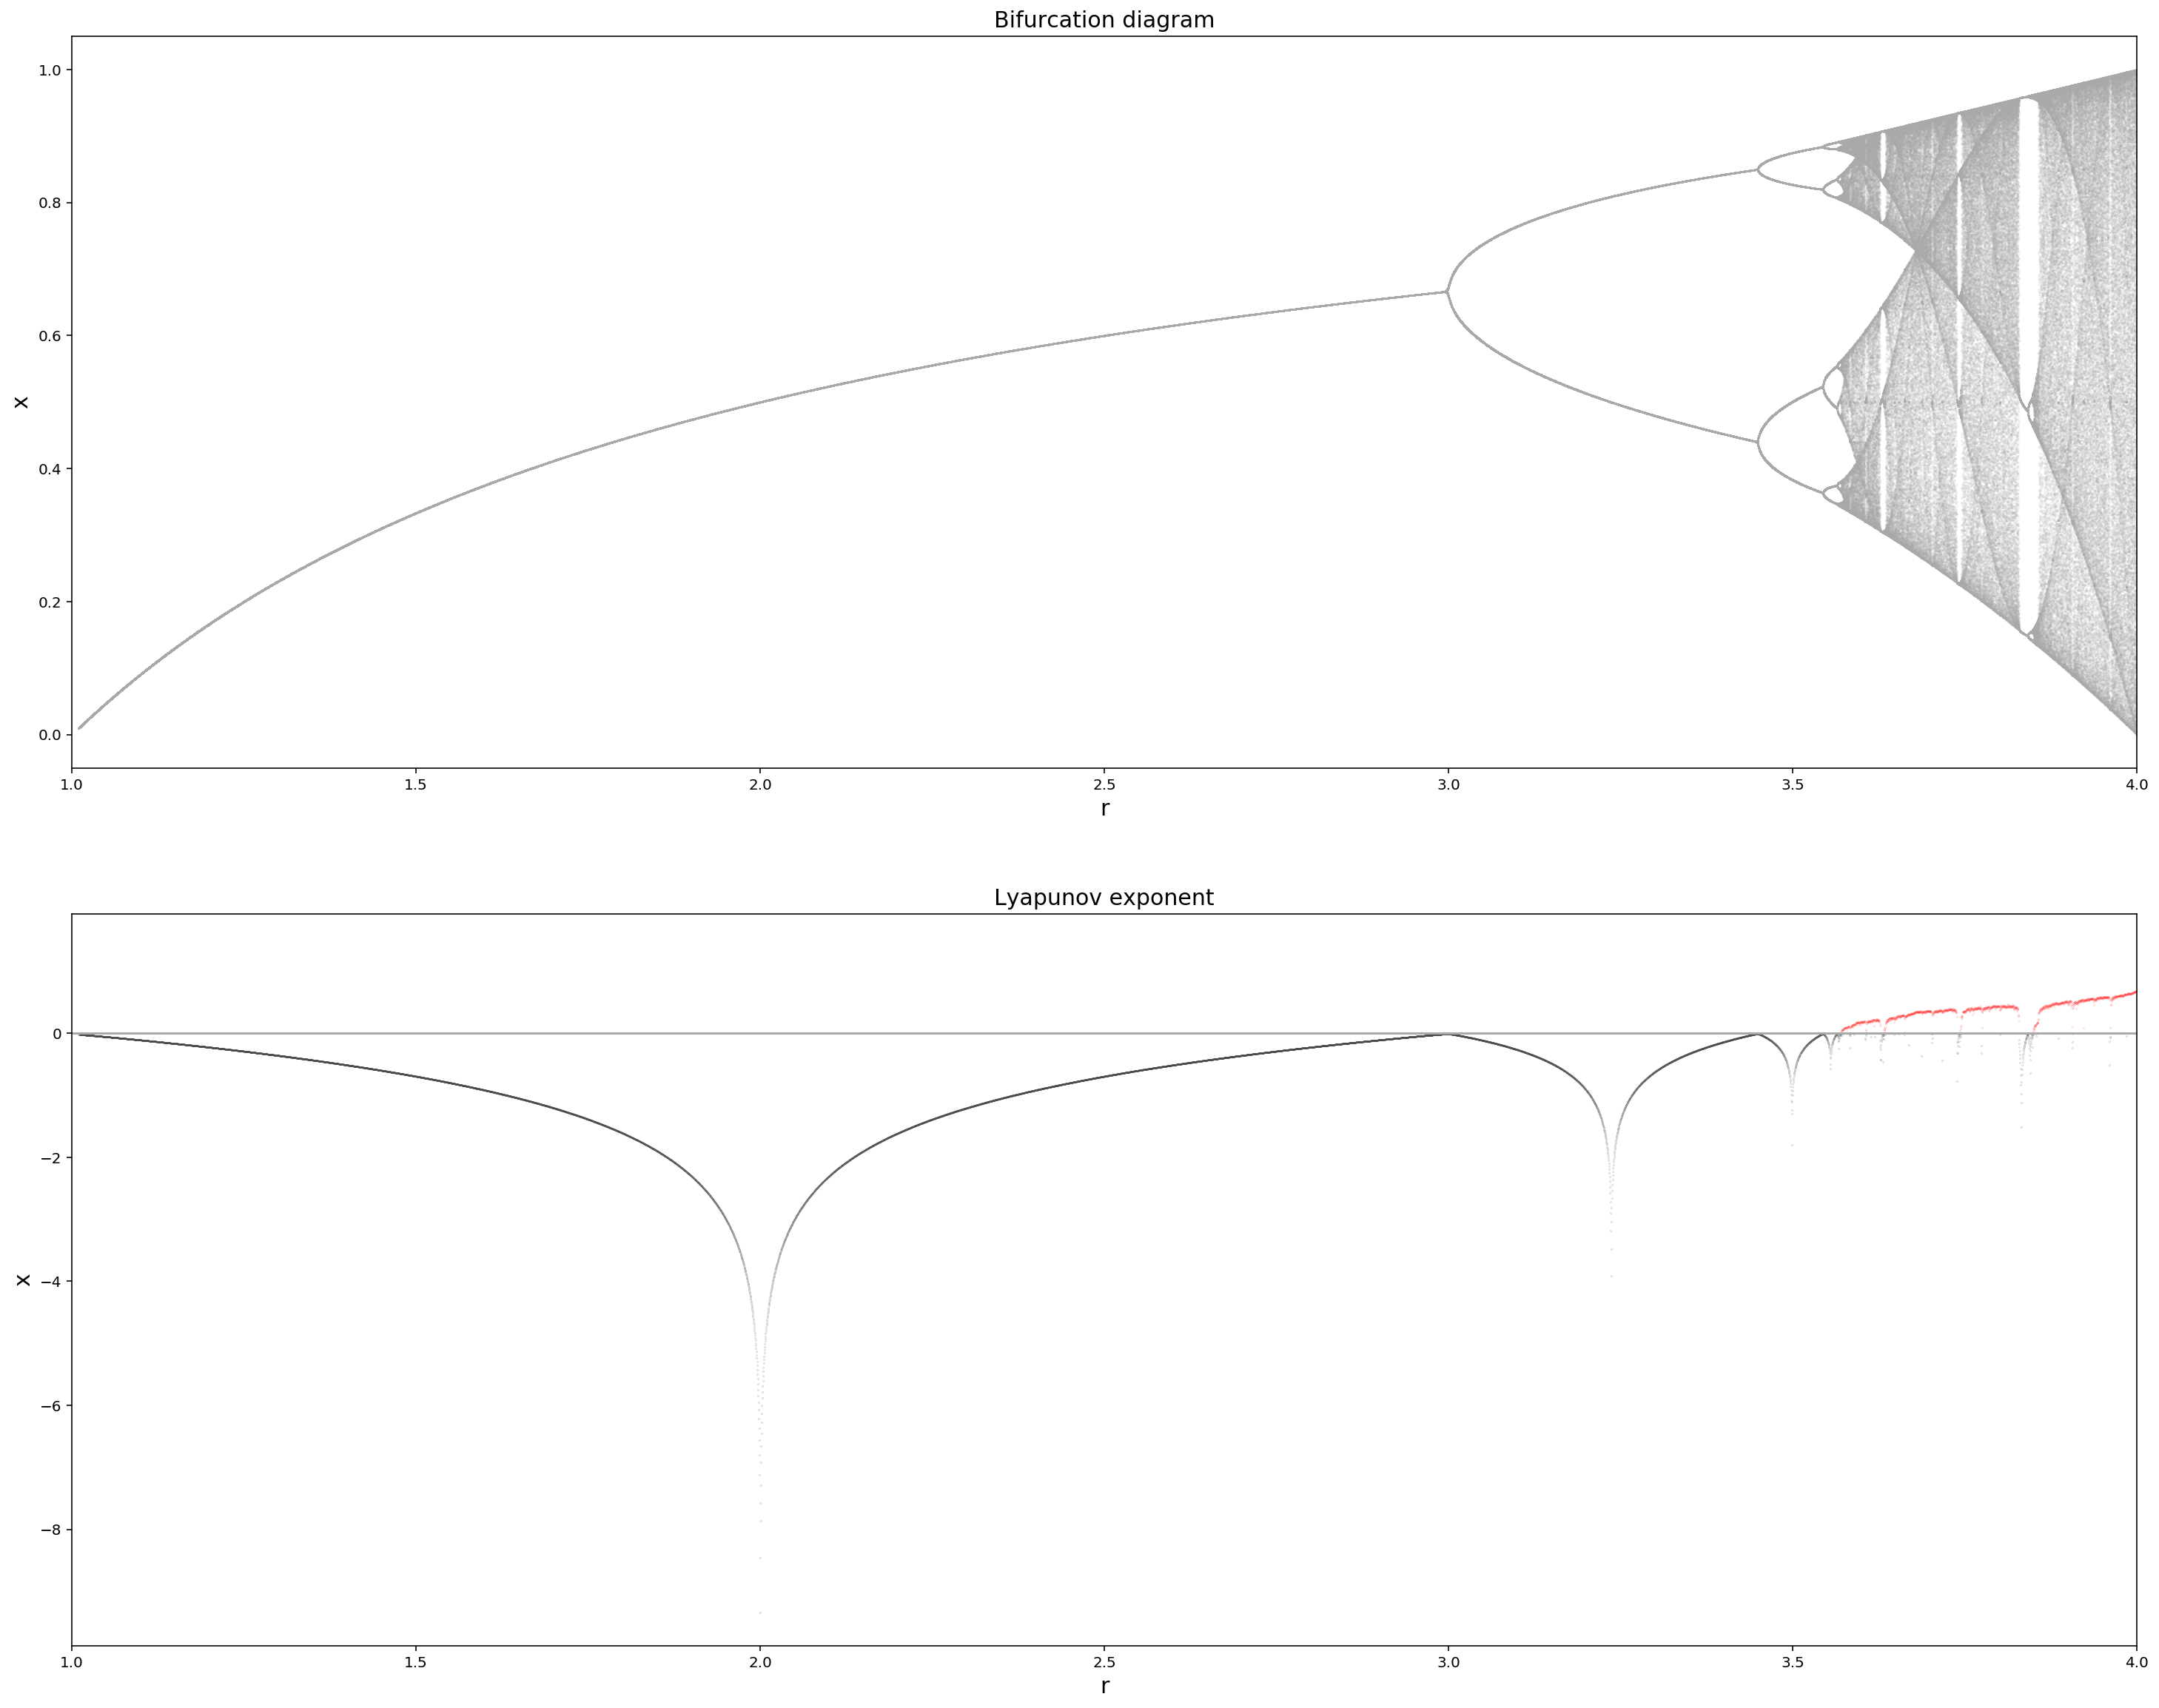

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (25,20))
m = 10000                  # number of r points
r = np.linspace(1.01, 4.0, m)
lyapunov= np.zeros(m)      #we will store exponents values here
iterations = 1000
last = 200
x = 0.5                    # initial value

for i in range(iterations):
    x = logistic(r, x)
    
    lyapunov += np.log(abs(r-2*r*x)) 
    
    if i >= (iterations - last):  # want to plot only specified number of iterations
        ax1.scatter(r, x, s = 0.005, c = 'darkgray')
        
ax1.set_xlim(1,4.0)
ax1.set_title('Bifurcation diagram', fontsize = 15)
ax1.set_xlabel('r', fontsize = 15)
ax1.set_ylabel('x', fontsize = 15)

ax2.scatter(r[lyapunov < 0], lyapunov[lyapunov < 0]/iterations, s = 0.005, c = 'k')
ax2.scatter(r[lyapunov >= 0], lyapunov[lyapunov >= 0]/iterations, s = 0.005, c = 'r')
ax2.hlines(0,1,4,colors = 'darkgray')
ax2.set_title("Lyapunov exponent", fontsize = 15)
ax2.set_xlabel("r", fontsize = 15)
ax2.set_ylabel("x", fontsize = 15)
ax2.set_xlim(1,4)

The obtained plots are consistent with what was predicted earlier. For coefficient value $r$ = (1,3), the function converges to one value for each iteration, and we see that as a straight line. The behaviour is ordered and it is consistent with Lyapunov exponent, which is negative, meaning no chaotic behaviour is present. Then, after the coefficient value $r$ = 3, the function splits in two. This is the oscillatory behaviour, that had been observed before, where population was oscillation between two values, never settling down for any of those. With further increasement the period of oscillations is increasing in a pattern of being next powers of two. We can see it is oscillation between 4 values, then 8, then this process speeds up rapidly until it reaches the coefficient value $r$ ~ 3.57. The birucation diagram spreads, giving nice looking pattern of dots. The behaviour seems chaotic and it actually is. Lyapunov exponent is also indicating this. Red colour on the graph means positive values and it is visible that the exponent values are indeed positive, meaning a chaos had been achieved. Nevertheless, even in chaos, some patterns can be found. The white spaces on the bifurcation diagram can be associated with sudden drops on the right hand side of the Lyapunov diagram, meaning the behaviour gets oredered for some time, only to come back to chaos moments after. One of these "sudden ordered behaviours" correspond to period being equal to 3, which is a strange thing because it was expected to have period being next powers of two.

## Discussion
It was possible to see that logistic equation can present chaotic behaviour and by investigation of theoretical population evolution, one could have better understanding of what factors cause the so called randomness. The value of the coefficient seems to be the main cause of changes. It was clearly visible when exploring the case when the process starts from different initial $x_n$ value, while the coefficient was held constant throughout the process. The function showed distinctive behaviour, for each coefficient value, converging to one value or presenting the oscillatory behaviour, to finally start having the apparent random behaviour. The Lyapunov exponent also gives significant information while investigating this topic. Its plot is consistent with bifurcation diagram. Where the logistic equation shows signs of random behaviour, the Lyapunov exponent provides a clear mathematical way of proving if that is in fact chaotic behaviour or not. The positive values on obtained plot (red dots) appear in the places of the widest spread of bifurcation diagram points. 
<br>
The bifurcation diagram can be linked to other, bizarre mathematical phenomenon, that is the Mandelbrot set. If that set is plotted, certain parts of the plot correspond directly to the bifurcation diagram. This can be seen in a figure below. 
 


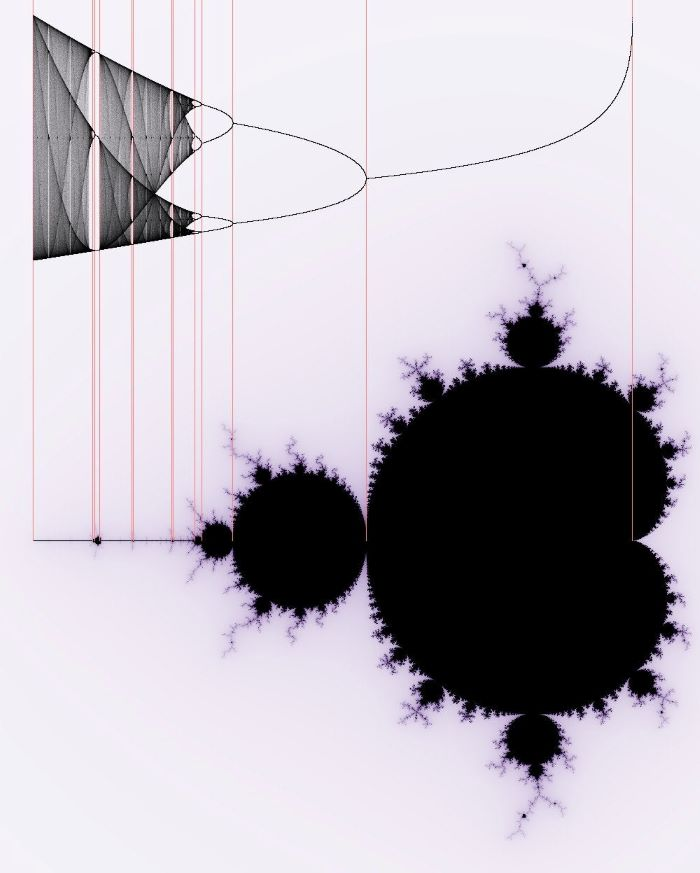!<a title="Jonny Hyman, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Logistic_Map_Bifurcations_Underneath_Mandelbrot_Set.gif"><img width="740" alt="Logistic Map Bifurcations Underneath Mandelbrot Set" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Logistic_Map_Bifurcations_Underneath_Mandelbrot_Set.gif/512px-Logistic_Map_Bifurcations_Underneath_Mandelbrot_Set.gif"></a>
<br>
Figure 2: Pictures of connection between Mandelbrot set and bifurcation diagram (images taken from wikip).

The point where the splits happen on the bifurcation diagram correspond precisely to the appearance of new “bulbs” on the Mandelbrot set plot. The interesting thing about this connection is that, it show the most interesting part of both plots happen to take place at the tip of the Mandelbrot set. The intuition would imply that the most important part would be huge bulbs that are the most visible at first glance. While taking about the tip, it is even possible to see miniaturized, repeated plot of the whole Mandelbrot set on it. When we check when does it take place, we can see that is corresponds to the region of the sudden “come back to order” moment on the bifurcation diagram. It is when the period of oscillation settles down for three value. As described in previous section, this is also consistent with Lyapunov exponent, which falls below zero, indicating that it in fact would be not chaotic part. The animation on the left hand side, shows how the two sets are directly connected by specific rotation. It means that these two can in fact be the same thing. Mandelbrot set is also obtained through many iterations of Mandelbrot equation (eq.3). It looks similar to the logistic equation, both functions are quadratic and present recurrence relation. The only difference appears when defining a coefficent value. 

## Conclusion
In this exploration, we were able to show the chaotic behaviour of mathematical model. The simple looking equation, present unpredictable behaviour when iterated properly. With the usage of Lyapunov exponent, the chaos could have been proven with maths and the results were consistent with what had been seen on the bifurcation diagram. Lastly, the connection was made between the logistic equation and Mandelbrot set, showing unordinary behaviour of the both plots.
<br>
The chaos theory is a very complex topic. Many new possible discoveries probably are now awaiting to for the uncovering. Mathematics had not once shown that the fields, which seemed to have been created out of pure imagination, often are applied in the real world situations. The logistic equation is already used as a population modelling tool. Maybe the further investigation will lead to further, more incredible properties. The possibility of the process being chaotic is already unusual itself, but things like connection to Mandelbrot or Feigenbaum constant indicate that there may be something more in this particular topic. The Feigenbaum constant, is not yet applicable in real world situations, but maybe in future it will appear as an significant factor in one of fields in physics.


## References
[1]. May, R. Simple mathematical models with very complicated dynamics. Nature 261, 459–467 (1976). https://doi.org/10.1038/261459a0
<br>
[2]. WolframMathWorld, https://mathworld.wolfram.com/LogisticMap.html
<br>
[3]. Fluidized Bed Technologies for Near-Zero Emission Combustion and Gasification
Woodhead Publishing Series in Energy
<br>
[4]. Wikipedia, https://en.wikipedia.org/wiki/Logistic_map
<br>
[5]. WolframMathWorld, https://mathworld.wolfram.com/MandelbrotSet.html
<br>
[6]. Jason M. Rubin, Can a computer generate a truly random number?, https://engineering.mit.edu/engage/ask-an-engineer/can-a-computer-generate-a-truly-random-number/